# Exercise 1
____

Bellow, you'll find the code that was used to generate the activity of place cells on a linear track. Use the code and the decoding procedure you learned to explore how different features of the data impact our ability to decode position. 

<font color='teal'> **Q1.1** - Try to use different fractions of the data samples. How does the median error change when the number of available samples gets larger? </font>

<font color='teal'> **Q1.2** - How many place cells do we need to reliably decode position? Try to re-do the decoding using only 10, 20, 30,... cells. How does the median error change? </font>

<font color='teal'> **Q1.3** - Generate new data changing the firing rate noise. How does this impact decoding? </font>
_____

In [1]:
import numpy as np
import scipy
import scipy.stats
import scipy.io
import matplotlib.pyplot as plt

In [2]:
track_length = 200.       # Linear track length
average_firing_rate = 5   # Peak firing rate, averaged across the population 
n_cells = 100 

pf_centers = np.random.rand(n_cells) * track_length                          # Place field centers
pf_size = np.random.gamma(10, size=n_cells)                                  # Place field widths 
pf_rate = np.random.exponential(scale=average_firing_rate, size=n_cells)     # Peak firing rate for each cell

bins = np.arange(0, 200)
true_firing_rate_maps = np.zeros((n_cells, len(bins)))

for i in range(n_cells):
    true_firing_rate_maps[i,:] = pf_rate[i] * np.exp(-((bins-pf_centers[i])**2)/(2*pf_size[i]**2))

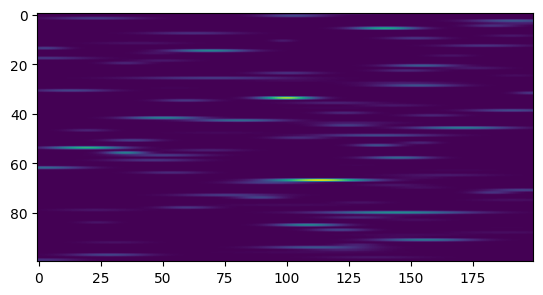

In [3]:
plt.imshow(true_firing_rate_maps)

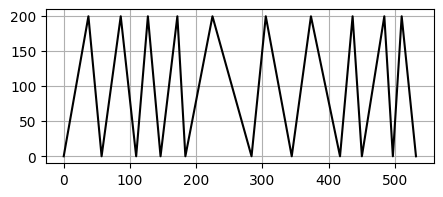

In [4]:
# Generate trajectory
n_runs = 10 
use_stops = False
avg_running_speed = 10
fps = 10

running_speed_a = np.random.chisquare(10, n_runs)
running_speed_b = np.random.chisquare(10, n_runs)

stopping_time_a = np.random.chisquare(15, n_runs)
stopping_time_b = np.random.chisquare(15, n_runs)

x = np.array([])

for i in range(n_runs):
    
    stop1 = np.zeros( int(stopping_time_a[i] * fps) )
    run_length = int( len(bins) * fps / running_speed_a[i] )
    run1 = np.linspace(0, float(len(bins) - 1), run_length)
    
    stop2 = np.ones((int(stopping_time_b[i]*fps),)) * (len(bins) - 1.)
    run_length = int( len(bins) * fps / running_speed_b[i] )
    run2 = np.linspace(len(bins) - 1, 0, run_length)
    
    if use_stops:
        x = np.concatenate((x, stop1, run1, stop2, run2))
    else:
         x = np.concatenate((x, run1, run2))

t = np.arange(len(x)) / fps

plt.figure(figsize=(5,2))
plt.plot(t, x, 'k')
plt.grid()

<font color='teal'> **Q1.1** - Try to use different fractions of the data samples. How does the median error change when the number of available samples gets larger? </font>

Different fractions of the data samples as in different sampling rates? Using a smaller sampling rate means collecting less data.

In [30]:
sampling_rate = 1000
t_sampling = np.arange(0, t[-1], 1. / sampling_rate)
x_sampling = np.floor(np.interp(t_sampling, t, x))
noise_firing_rate = 0.1 
spikes = []

for i in range(n_cells):
    inst_rate = true_firing_rate_maps[i,x_sampling.astype(np.int32)] + noise_firing_rate
    spikes_loc = np.random.poisson(inst_rate/sampling_rate)
    sp = np.argwhere(spikes_loc)
    t_sp = t_sampling[sp]
    spikes.append(t_sp)

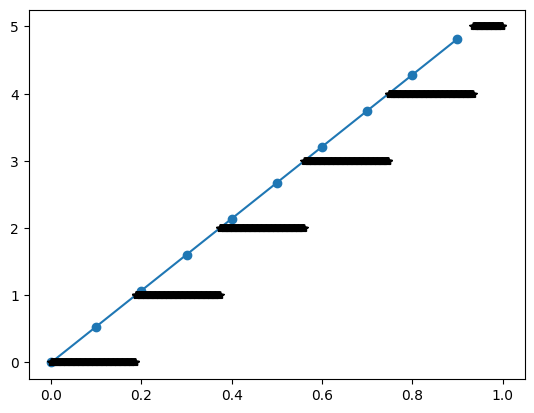

In [32]:
plt.plot(t[:10], x[:10],'o-')
plt.plot(t_sampling[:1000], x_sampling[:1000],'*k')